In [375]:
import pandas as pd
import numpy as np
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['image.cmap'] = 'hot_r'
from matplotlib.colors import LogNorm

from scipy.optimize import curve_fit

%matplotlib inline

In [376]:
indir = "/eos/user/a/alobanov/HGCAL/testbeam/analysis/TOA/scripts/calib_oct2018/"

In [377]:
fnames = glob.glob(indir + 'TOA_calib_ranges_run_*')

In [378]:
len(fnames)

613

In [379]:
! head /eos/user/a/alobanov/HGCAL/testbeam/analysis/TOA/scripts/calib_oct2018/TOA_calib_ranges_run_661.txt

chip_id,chan_id,toaRise_min,toaRise_max,toaFall_min,toaFall_max
5,2,1249,2706,1163,2755
5,10,1195,2789,1171,2776
5,36,1199,2796,1193,2788
5,38,1189,2794,1197,2794
5,40,1199,2792,1218,2800
5,42,1191,2786,1201,2791
5,44,1267,2734,1362,2785
5,54,1195,2793,1185,2758
5,56,1182,2788,1240,2781


In [380]:
dfs = []
for fname in fnames:
    run = int(fname[fname.find('run_')+4:fname.find('.txt')])
    df = pd.read_csv(fname)
    df['run'] = run
    
    dfs.append(df)

In [381]:
df = pd.concat(dfs)

In [382]:
df.head()

chip_id  chan_id  toaRise_min  toaRise_max  toaFall_min  toaFall_max   run
0        5        6         1310         2329         1313         2788  1000
1        5       36         1207         2833         1204         2825  1000
2        5       38         1204         2827         1221         2827  1000
3        5       40         1236         2815         1233         2829  1000
4        5       42         1207         2809         1233         2779  1000

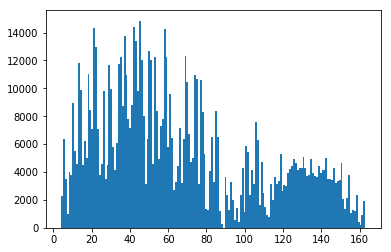

In [383]:
r = plt.hist(df.chip_id, 4*40)

In [384]:
df['rechit_chip_id'] = df.chip_id

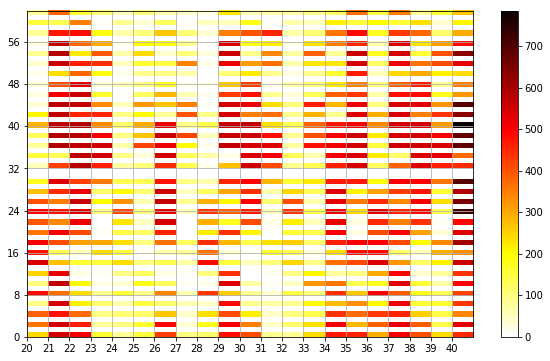

In [385]:
fig = plt.figure(figsize = (10,6))

# min_chip = df.chip_id.min()
# max_chip = df.chip_id.max()
min_chip = 20
max_chip = 40

plt.hist2d(df.chip_id,df.chan_id, bins = (range(min_chip,max_chip+2),64))

plt.xticks(range(min_chip,max_chip+1))
plt.yticks(range(0,64,8))

plt.grid()
plt.colorbar()
plt.show()

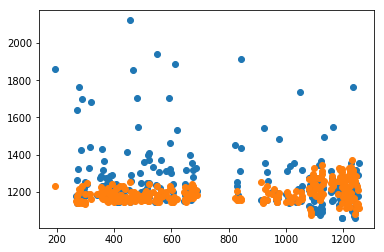

In [386]:
sel = df.chip_id == 40
sel &= df.chan_id == 40

df_sel = df[sel]
plt.plot(df_sel.run, df_sel.toaRise_min, 'o')
plt.plot(df_sel.run, df_sel.toaFall_min, 'o')

In [387]:
chip = 30

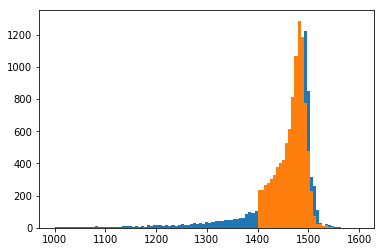

In [388]:
sel = df.run > -900
sel &= df.chip_id == chip

df_sel = df[sel]
bins = np.linspace(1000,1600,100)
r = plt.hist(df_sel.toaRise_max - df_sel.toaRise_min, bins)
r = plt.hist(df_sel.toaFall_max - df_sel.toaFall_min, bins)

Text(0.5,0,u'TOA fall range (max-min)')

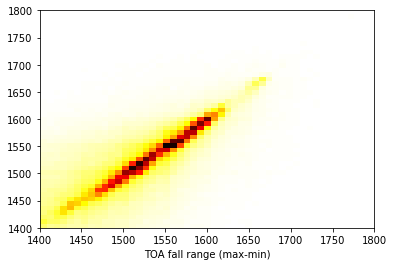

In [413]:
sel = df.run < 900
#sel &= df.chip_id == chip

df_sel = df[sel]
bins = np.linspace(1400,1800,50)
r = plt.hist2d(df_sel.toaRise_max - df_sel.toaRise_min, 
               df_sel.toaFall_max - df_sel.toaFall_min, bins)#, norm = LogNorm())

plt.xlabel('TOA rise range (max-min)')
plt.xlabel('TOA fall range (max-min)')

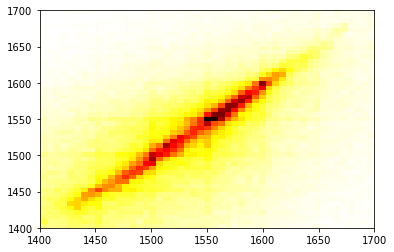

In [390]:
sel = df.run > 900
#sel &= df.chip_id == chip

df_sel = df[sel]
bins = np.linspace(1400,1700,50)
r = plt.hist2d(df_sel.toaRise_max - df_sel.toaRise_min, 
               df_sel.toaFall_max - df_sel.toaFall_min, bins)#, norm = LogNorm())

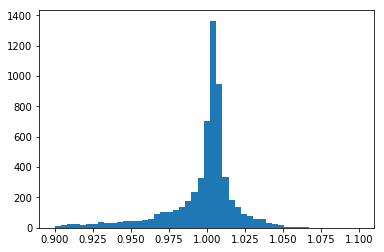

In [391]:
sel = df.run < 900
sel &= df.chip_id == chip

df_sel = df[sel]
bins = np.linspace(0.9,1.1,50)
r = plt.hist((df_sel.toaRise_max - df_sel.toaRise_min) / 
               (df_sel.toaFall_max - df_sel.toaFall_min), bins)#, norm = LogNorm())

In [392]:
df['range_ratio'] = (df.toaRise_max - df.toaRise_min) / (df.toaFall_max - df.toaFall_min)

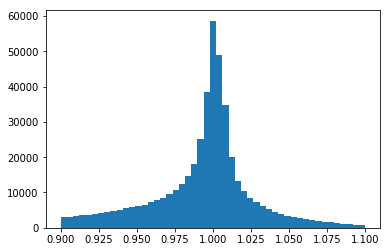

In [393]:
sel = df.run < 900
#sel &= df.chip_id == chip

df_sel = df[sel]
bins = np.linspace(0.9,1.1,50)
r = plt.hist(df_sel.range_ratio, bins)#, norm = LogNorm())

Text(0,0.5,u'TOA range ratios')

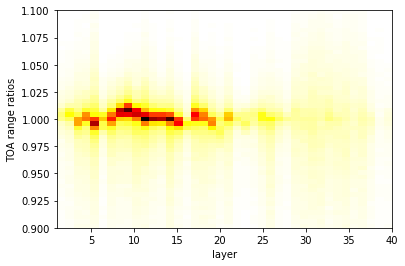

In [414]:
sel = df.run < 900
#sel &= df.chip_id == chip

df_sel = df[sel]
bins = np.linspace(0.9,1.1,50)
r = plt.hist2d(df_sel.chip_id//4, df_sel.range_ratio, (40,bins))#, norm = LogNorm())

plt.xlabel('layer')
plt.ylabel('TOA range ratios')

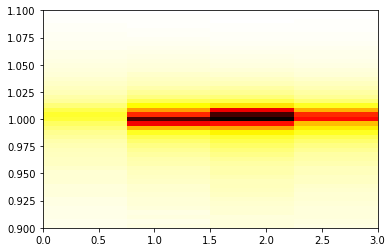

In [395]:
sel = df.run < 900
#sel &= df.chip_id == chip

df_sel = df[sel]
bins = np.linspace(0.9,1.1,50)
r = plt.hist2d(df_sel.chip_id%4, df_sel.range_ratio, (4,bins))#, norm = LogNorm())

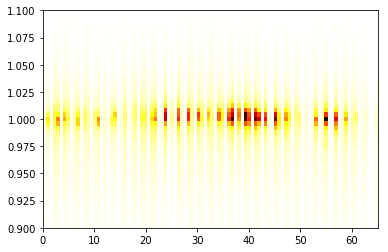

In [396]:
sel = df.run < 900
#sel &= df.chip_id == chip

df_sel = df[sel]
bins = np.linspace(0.9,1.1,50)
r = plt.hist2d(df_sel.chip_id%4+df_sel.chan_id, df_sel.range_ratio, (100,bins))#, norm = LogNorm())

Text(0,0.5,u'TOA fall min')

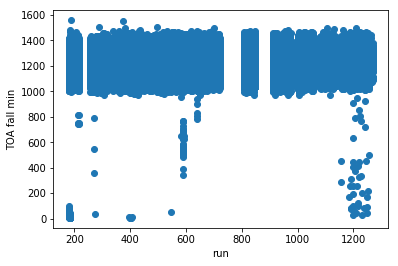

In [412]:
sel = df.run > -900
#sel &= df.chip_id == chip

df_sel = df[sel]
#plt.plot(df_sel.run, df_sel.toaRise_min, 'o')
plt.plot(df_sel.run, df_sel.toaFall_min, 'o')

plt.xlabel('run')
plt.ylabel('TOA fall min')

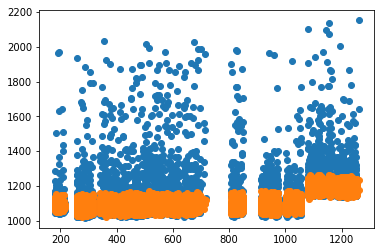

In [397]:
sel = df.run > -900
sel &= df.chip_id == chip

df_sel = df[sel]
plt.plot(df_sel.run, df_sel.toaRise_min, 'o')
plt.plot(df_sel.run, df_sel.toaFall_min, 'o')

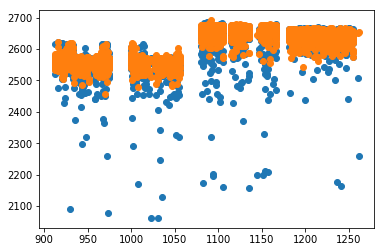

In [398]:
sel = df.run > 900
sel &= df.chip_id == chip

df_sel = df[sel]
plt.plot(df_sel.run, df_sel.toaRise_max, 'o')
plt.plot(df_sel.run, df_sel.toaFall_max, 'o')

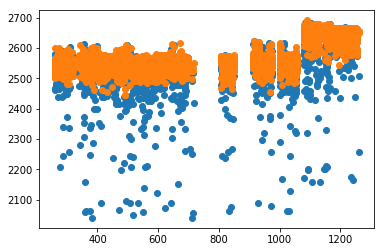

In [399]:
sel = df.run > 258
sel &= df.chip_id == chip

df_sel = df[sel]
plt.plot(df_sel.run, df_sel.toaRise_max, 'o')
plt.plot(df_sel.run, df_sel.toaFall_max, 'o')

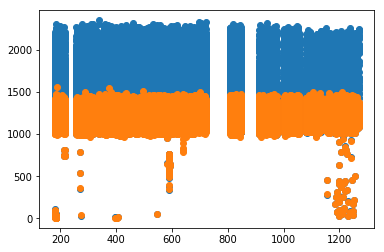

In [400]:
plt.plot(df.run, df.toaRise_min, 'o')
plt.plot(df.run, df.toaFall_min, 'o')

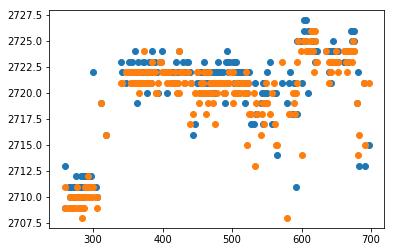

In [401]:
sel = (df.run > 258) & (df.run < 800)
sel &= df.chip_id == 46
sel &= df.chan_id == 36
sel &= abs(df.range_ratio - 1) < 0.01

df_sel = df[sel]
plt.plot(df_sel.run, df_sel.toaRise_max, 'o')
plt.plot(df_sel.run, df_sel.toaFall_max, 'o')

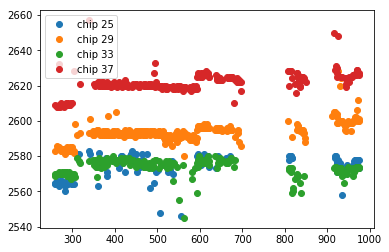

In [402]:
for chip in range(25,40,4):

    sel = (df.run > 258) & (df.run < 990)
    sel &= df.chip_id == chip
    sel &= df.chan_id == 36
    sel &= abs(df.range_ratio - 1) < 0.01

    df_sel = df[sel]
    plt.plot(df_sel.run, df_sel.toaRise_max, 'o', label = 'chip %i' %chip)
    
plt.legend()

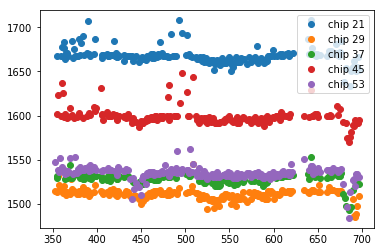

In [403]:
for chip in range(4*5 + 1,4*14,8):

    sel = (df.run > 350) & (df.run < 700)
    sel &= df.chip_id == chip
    sel &= df.chan_id == 38
    sel &= abs(df.range_ratio - 1) < 0.01

    df_sel = df[sel]
    plt.plot(df_sel.run, df_sel.toaRise_max - df_sel.toaRise_min, 'o', label = 'chip %i' %chip)
    
plt.legend()

Text(0,0.5,u'TOA rise max')

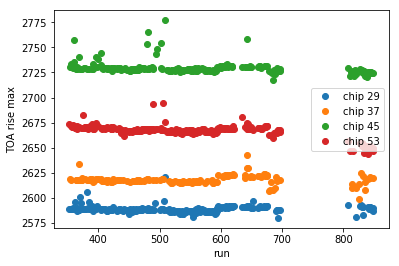

In [418]:
for chip in range(4*7 + 1,4*14,8):

    sel = (df.run > 350) & (df.run < 900)
    sel &= df.chip_id == chip
    sel &= df.chan_id == 38
    sel &= abs(df.range_ratio - 1) < 0.01

    df_sel = df[sel]
    plt.plot(df_sel.run, df_sel.toaRise_max, 'o', label = 'chip %i' %chip)
    #plt.plot(df_sel.run, df_sel.toaRise_min, '.', label = 'chip %i' %chip)
    
plt.legend()
plt.xlabel('run')
plt.ylabel('TOA rise max')

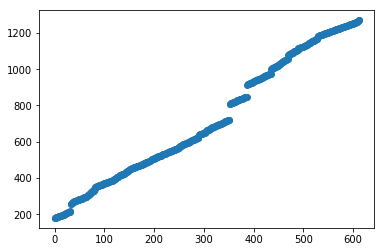

In [405]:
plt.plot(sorted(df.run.unique()), 'o')

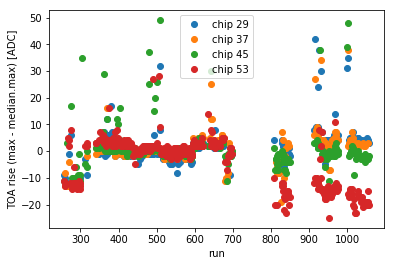

In [416]:
for chip in range(4*7 + 1,4*14,8):

    sel = (df.run > 250) & (df.run < 1060)
    sel &= df.chip_id == chip
    sel &= df.chan_id == 38
    sel &= abs(df.range_ratio - 1) < 0.01

    df_sel = df[sel]
    plt.plot(df_sel.run, df_sel.toaRise_max - df_sel.toaRise_max.median(), 'o', label = 'chip %i' %chip)
    #plt.plot(df_sel.run, df_sel.toaRise_min, '.', label = 'chip %i' %chip)
    
plt.xlabel('run')
plt.ylabel('TOA rise (max - median.max) [ADC]')
plt.legend()

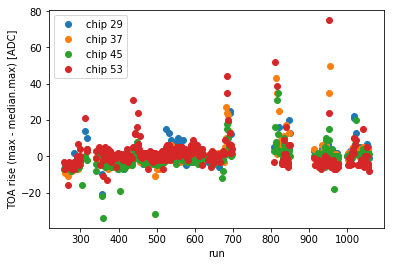

In [417]:
for chip in range(4*7 + 1,4*14,8):

    sel = (df.run > 250) & (df.run < 1060)
    sel &= df.chip_id == chip
    sel &= df.chan_id == 38
    sel &= abs(df.range_ratio - 1) < 0.01

    df_sel = df[sel]
    plt.plot(df_sel.run, df_sel.toaRise_min - df_sel.toaRise_min.median(), 'o', label = 'chip %i' %chip)
    #plt.plot(df_sel.run, df_sel.toaRise_min, '.', label = 'chip %i' %chip)
    
plt.xlabel('run')
plt.ylabel('TOA rise (max - median.max) [ADC]')
plt.legend()

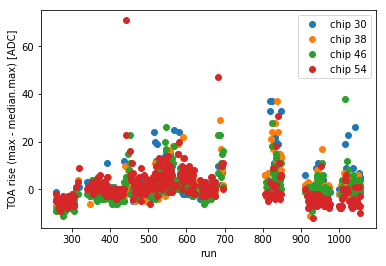

In [415]:
for chip in range(4*7 + 2,4*14,8):

    sel = (df.run > 250) & (df.run < 1060)
    sel &= df.chip_id == chip
    sel &= df.chan_id == 38
    sel &= abs(df.range_ratio - 1) < 0.01

    df_sel = df[sel]
    plt.plot(df_sel.run, df_sel.toaRise_min - df_sel.toaRise_min.median(), 'o', label = 'chip %i' %chip)
    #plt.plot(df_sel.run, df_sel.toaRise_min, '.', label = 'chip %i' %chip)
    
plt.xlabel('run')
plt.ylabel('TOA rise (max - median.max) [ADC]')
plt.legend()